# Klasyfikacja gwiazd - EDA


### Pakiety 

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Podział danych na zbiór treningowy i testowy

In [6]:
# wczytanie danych
df = pd.read_csv('./data/development_data.csv')

# podział danych na zbiór treningowy i testowy
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# reset indeksów
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

### Informacje o kolumnach 
źródło: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download

obj_ID = identyfikator obiektu, unikalna wartość identyfikująca obiekt w katalogu obrazów używanym przez CAS

alpha = kąt prawego wzniesienia (w epoce J2000)

delta = kąt deklinacji (w epoce J2000)

u = Filtr ultrafioletowy w systemie fotometrycznym

g = filtr zielony w systemie fotometrycznym

r = filtr czerwony w systemie fotometrycznym

i = Filtr bliskiej podczerwieni w systemie fotometrycznym

z = Filtr podczerwieni w systemie fotometrycznym

run_ID = numer przebiegu używany do identyfikacji konkretnego skanu

rereun_ID = numer ponownego uruchomienia określający sposób przetworzenia obrazu

cam_col = kolumna kamery do identyfikacji linii skanowania w przebiegu

field_ID = numer pola do identyfikacji każdego pola

spec_obj_ID = Unikalny identyfikator używany dla obiektów spektroskopii optycznej (oznacza to, że 2 różne obserwacje z tym samym identyfikatorem spec_obj_ID muszą dzielić klasę wyjściową)

class = klasa obiektu (galaktyka, gwiazda lub kwazar)

redshift = wartość przesunięcia ku czerwieni oparta na wzroście długości fali

plate = identyfikator tablicy, identyfikuje każdą tablicę w SDSS

MJD = zmodyfikowana data juliańska, używana do wskazania, kiedy dany fragment danych SDSS został pobrany

fiber_ID = identyfikator włókna identyfikujący włókno, które skierowało światło na płaszczyznę ogniskową w każdej obserwacji



### Podstawowe informacje o danych
Zauważamy, że nie ma brakujących danych. Wszystkie typy są liczbowe (int lub float), z wyjątkiem kolumny 'class'.

In [5]:
train_df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237651e+18,147.392648,0.145509,23.62785,21.78850,21.73961,21.88235,21.43752,1239,301,4,181,4.308885e+18,QSO,2.333820,3827,55565,240
1,1.237665e+18,157.156740,35.327317,18.60880,17.52187,17.12905,16.95103,16.89711,4518,301,6,192,2.204664e+18,GALAXY,0.043298,1958,53385,553
2,1.237667e+18,94.688025,63.535297,18.16716,16.51485,15.75641,15.35805,15.23041,5060,301,1,100,2.588464e+18,STAR,-0.000342,2299,53711,74
3,1.237655e+18,214.420238,-1.506597,19.83027,18.47293,17.82672,17.48600,17.26200,2334,301,5,124,1.032563e+18,GALAXY,0.081886,917,52400,411
4,1.237668e+18,204.749167,17.703206,19.33024,18.16558,17.74244,17.48129,17.32534,5314,301,1,181,2.935343e+18,GALAXY,0.061780,2607,54184,443
5,1.237680e+18,9.472956,27.896687,21.84835,21.25768,21.25116,20.99355,20.66064,8103,301,5,152,7.073156e+18,QSO,0.825294,6282,56572,920
6,1.237679e+18,6.514320,3.725924,22.89606,23.08747,21.51780,20.37108,19.72461,7712,301,6,373,9.848332e+18,GALAXY,0.552285,8747,57401,311
7,1.237663e+18,322.397605,0.185066,18.85759,17.69771,17.27650,17.04447,16.80128,4187,301,4,98,1.112519e+18,GALAXY,0.030239,988,52520,473
8,1.237661e+18,127.444409,28.226463,22.28067,22.19123,21.79689,21.05735,20.96889,3560,301,4,132,1.082237e+19,GALAXY,0.971070,9612,57801,798
9,1.237664e+18,15.845389,-0.696173,18.09889,16.67957,16.11639,15.88822,15.82032,4263,301,2,221,2.604293e+18,STAR,0.000112,2313,53726,315


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       49000 non-null  float64
 1   alpha        49000 non-null  float64
 2   delta        49000 non-null  float64
 3   u            49000 non-null  float64
 4   g            49000 non-null  float64
 5   r            49000 non-null  float64
 6   i            49000 non-null  float64
 7   z            49000 non-null  float64
 8   run_ID       49000 non-null  int64  
 9   rerun_ID     49000 non-null  int64  
 10  cam_col      49000 non-null  int64  
 11  field_ID     49000 non-null  int64  
 12  spec_obj_ID  49000 non-null  float64
 13  class        49000 non-null  object 
 14  redshift     49000 non-null  float64
 15  plate        49000 non-null  int64  
 16  MJD          49000 non-null  int64  
 17  fiber_ID     49000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

In [8]:
rain_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,4.900000e+04,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.0,49000.000000,49000.000000,4.900000e+04,49000.000000,49000.000000,49000.000000,49000.000000
mean,1.237665e+18,177.604538,24.130549,22.098590,20.640322,19.654032,19.091864,18.774755,4479.874204,301.0,3.510041,185.663082,5.795201e+18,0.576246,5147.062449,55594.878388,448.903694
std,8.424456e+12,96.435544,19.641175,2.253116,2.033170,1.852267,1.755689,1.762076,1961.481078,0.0,1.587281,149.048257,3.326069e+18,0.729714,2954.126386,1807.437362,272.525616
min,1.237646e+18,0.005528,-18.785328,12.101680,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995801e+17,-0.007352,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.684086,5.256838,20.366730,18.980867,18.158278,17.754460,17.475920,3187.000000,301.0,2.000000,81.000000,2.849788e+18,0.054130,2531.000000,54242.000000,220.000000
50%,1.237663e+18,180.714503,23.667032,22.196395,21.103490,20.134315,19.410960,19.007725,4188.000000,301.0,4.000000,146.000000,5.616045e+18,0.424114,4988.000000,55881.000000,431.000000
75%,1.237668e+18,233.825251,39.834615,23.713487,22.127880,21.041418,20.405950,19.925895,5326.000000,301.0,5.000000,240.000000,8.337758e+18,0.704122,7405.250000,56780.000000,644.000000
max,1.237681e+18,359.999031,82.816030,30.660390,30.607000,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412684e+19,7.011245,12547.000000,58932.000000,1000.000000


### Target
Badamy liczbę występowań różnych wartości w kolumnie 'class', w której mamy 3 możliwe wartości: GALAXY, STAR i QSO.

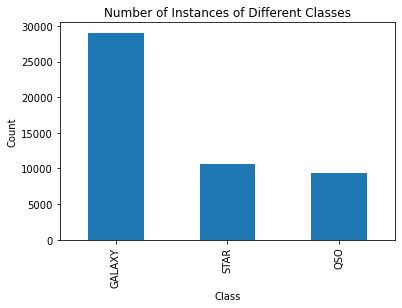

In [10]:
train_df['class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Instances of Different Classes')
plt.show()

### Rozkłady poszczególnych zmiennych
Pomimo, że wszystkie zmienne są typu *float*, to nadal możemy mieć zmienne dyskretne/kategoryczne. Tak jest w przypadku rereun_ID (numer ponownego uruchomienia określający sposób przetworzenia obrazu) i cam_col (kolumna kamery do identyfikacji linii skanowania w przebiegu).

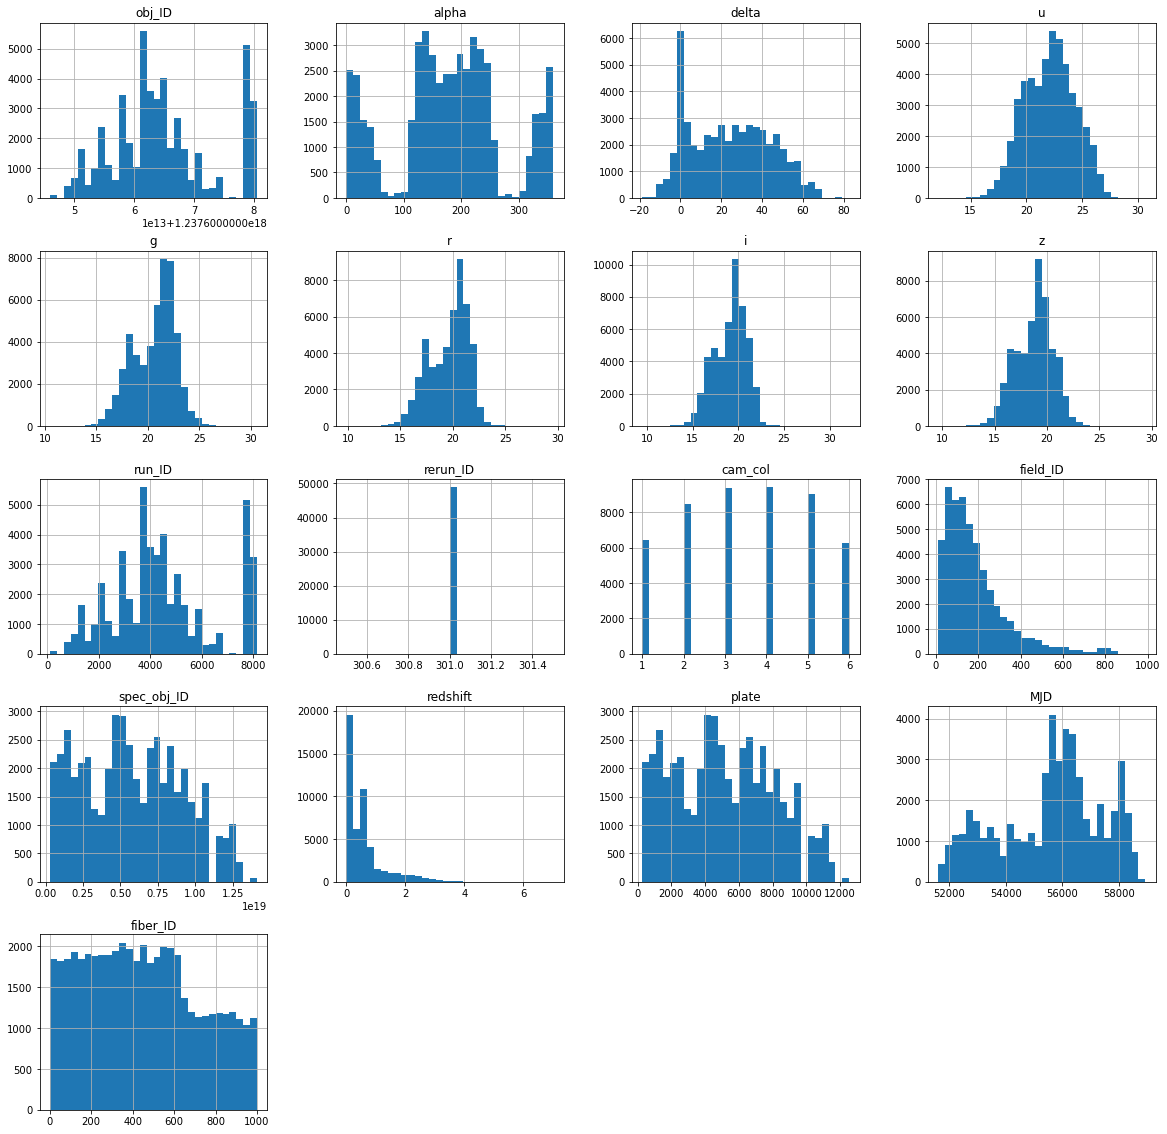

In [13]:
train_df.hist(bins=30, figsize=(20,20))
plt.show()